# Homework 14 Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dt = 1e-9
tfinal = 500e-6
N = int(tfinal/dt)
time = np.linspace(0,500e-6, N)
f = 25e6 # Frequency of the Radar
def ref_func(t):
    if 0 < t < 20e-6:
        return np.sin(2*np.pi*f*t)
    else:
        return 0
ref = []
for t in time:
    ref.append(ref_func(t))

In [12]:
np.array(2)

array(2)

Text(0, 0.5, 'Amplitude of the pulse')

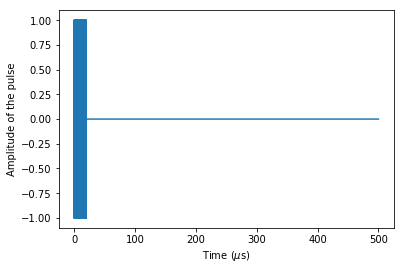

In [3]:
plt.plot(time/1e-6,ref,)
plt.xlabel('Time ($\mu$s)')
plt.ylabel('Amplitude of the pulse')

In [4]:
data = pd.read_csv("EchoData.csv")
echo = data["echo"]
time = data["t"]

Text(0, 0.5, 'Amplitude of the echo')

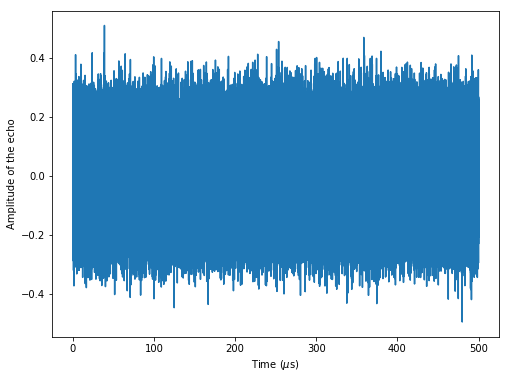

In [5]:
plt.figure(figsize = (8,6))
plt.plot(time/1e-6,echo)
plt.xlabel('Time ($\mu$s)')
plt.ylabel('Amplitude of the echo')

In [6]:
fe = np.fft.fft(echo)
nu = np.fft.fftfreq(len(time),1e-9)

Text(0, 0.5, 'Power Spectra')

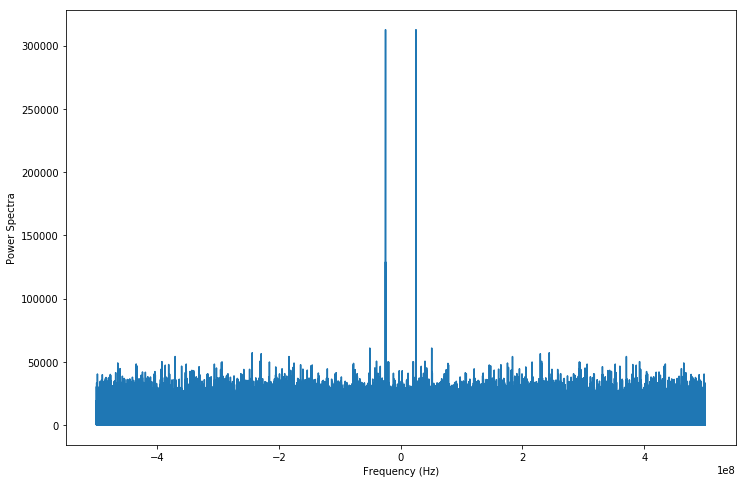

In [22]:
plt.figure(figsize = (12,8))
plt.plot(nu, np.absolute(fe)**2,zorder = 1)
#plt.vlines([-25e6, 25e6],0,max( np.absolute(fe)**2), 'red', 'dashed', zorder = 2, alpha = 0.7)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectra')

In [8]:
fr = np.fft.fft(ref)
frstar = np.conjugate(fr)
re = np.fft.ifft(frstar*fe)

Text(0, 0.5, 'Cross Correlation between pulse and echo')

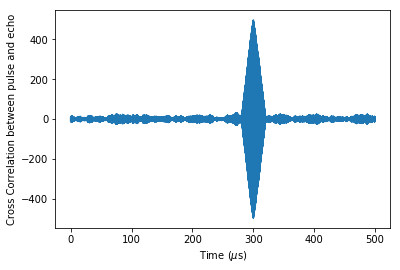

In [23]:
plt.plot(time/1e-6, np.real(re))
plt.xlabel('Time ($\mu$s)')
plt.ylabel('Cross Correlation between pulse and echo')

In [10]:
dt = 1e-9
tfinal = 500e-6
N = int(tfinal/dt)
time = np.linspace(0,500e-6, N)
f = 20e6 # Frequency of the Radar
def ref_func_chirp(t):
    if 0 < t < 20e-6:
        return np.sin(2*np.pi*(f + 5e11*t)*t)
    else:
        return 0
ref_chirp = []
for t in time:
    ref_chirp.append(ref_func_chirp(t))

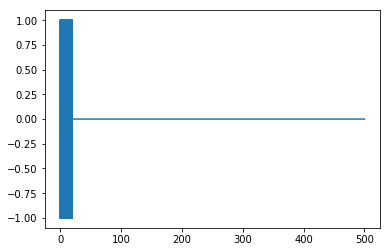

In [11]:
plt.plot(time/1e-6,ref_chirp,)
plt.xlabel('Time ($\mu$s)')
plt.ylabel('Chirp')

In [12]:
data = pd.read_csv("EchoChirpData.csv")
echoc = data["echo_chirp"]
time = data["t"]

Text(0, 0.5, 'Amplitude of the echo with chirp')

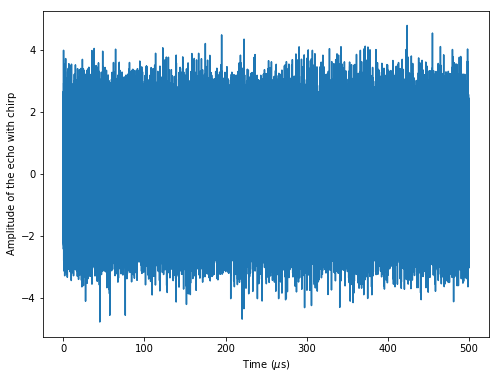

In [25]:
plt.figure(figsize = (8,6))
plt.plot(time/1e-6,echoc)
plt.xlabel('Time ($\mu$s)')
plt.ylabel('Amplitude of the echo with chirp')

In [14]:
fec = np.fft.fft(echoc)
nu = np.fft.fftfreq(len(time),1e-9)

Text(0, 0.5, 'Power spectra of Echo')

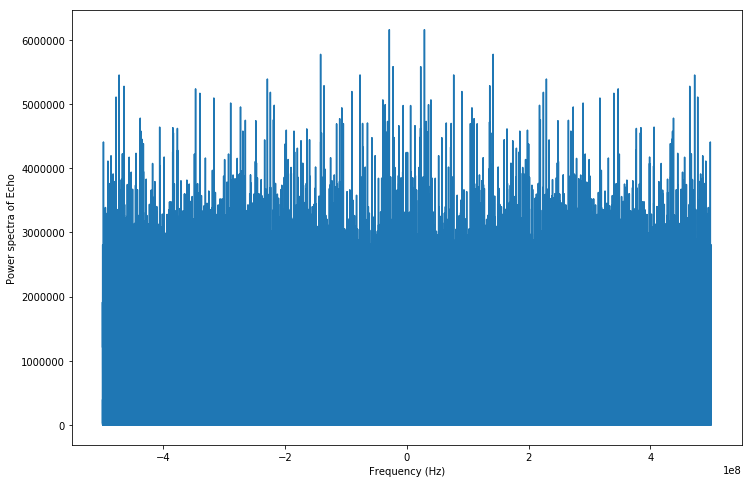

In [26]:
plt.figure(figsize = (12,8))
plt.plot(nu, np.absolute(fec)**2,zorder = 1)
#plt.vlines([-25e6, 25e6],0,max( np.absolute(fe)**2), 'red', 'dashed', zorder = 2, alpha = 0.7)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectra of Echo')

In [16]:
frc = np.fft.fft(ref_chirp)
frstarc = np.conjugate(frc)
rec = np.fft.ifft(frstarc*fec)

Text(0, 0.5, 'Cross correlation of Chirp and Echo')

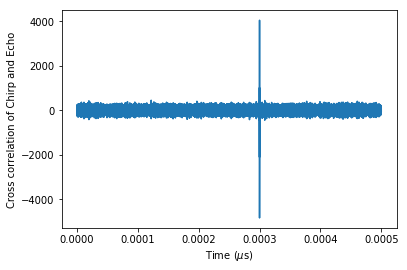

In [27]:
plt.plot(time, np.real(rec))
plt.xlabel('Time ($\mu$s)')
plt.ylabel('Cross correlation of Chirp and Echo')

In [18]:
100000/3e8

0.0003333333333333333